## 5.1 분류와 회귀
### 5.1.1 분류
- 정해진 범주에 구분해 넣는 작업 : 타겟값이 범주형 데이터

### 5.1.2 회귀
- 변수 사이 관계 규명, 독립변수와 종속변수 간 관계 모델링 
- 독립변수 : 영향을 미치는 변수
- 종속변수 : 영향을 받는 변수, 수치형 데이터


### 회귀 평가지표
- MAE : 평균 절대 오차 $ \frac{1}{N}\sum^N_{i=1}|y_i-\hat{y}|$
- MSE : 평균 제곱 오차 $ \frac{1}{N}\sum^N_{i=1}(y_i-\hat{y})^2$
- RMSE : 평균 제곱근 오차 $ \sqrt{\frac{1}{N}\sum^N_{i=1}(y_i-\hat{y})^2}$
- MSLE : Mean Squared Log Error $ \frac{1}{N}\sum^N_{i=1}(log(y_i+1)-log(\hat{y_i}+1))^2 $
- RMSLE : Root Mean Squared Log Error $ \sqrt{\frac{1}{N}\sum^N_{i=1}(log(y_i+1)-log(\hat{y_i}+1))^2} $
- $R^2$ : 결정계수,  $ \frac{(예측 타깃값의 분산)}{(실제 타깃값의 분산)} $


In [4]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1,2,3,2,3,5,4,6,5,6,7,8,8,])
preds = np.array([1,1,2,2,3,4,4,5,5,7,7,6,8,])

mae = mean_absolute_error(true, preds)
mse = mean_squared_error(true, preds)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(true, preds)
rmsle = np.sqrt(msle)
r2 = r2_score(true, preds)

print(f'MAE: {mae:.4f}\t, MSE: {mse:.4f}\t, RMSE: {rmse:.4f}')
print(f'MSLE: {msle:.4f}\t, RMSLE: {rmsle:.4f}\t, R2: {r2:.4f}')

MAE: 0.5385	, MSE: 0.6923	, RMSE: 0.8321
MSLE: 0.0296	, RMSLE: 0.1721	, R2: 0.8617


## 5.2 분류 평가지표
### 5.2.1 오차행렬
- 정확도 : 실제값과 예측값이 얼마나 일치되는지 비율. 전체 값 중 TP, TN이 차지하는 비율 $\frac{TP+TN}{TP+FP+FN+TN} $
- 정밀도 : 양성 예측의 정확도, 음성을 양성으로 잘못 판단하면 문제가 발생하는 경우(스팸 메일) $\frac{TP}{TP+FP}$
- 재현율 : 실제 양성값 중 양성으로 잘 예측한 값의 비율. 양성을 음성으로 판단하면 잘못되는 문제 (암진단) $\frac{TP}{TP+FN}$
- F1 점수 : 정밀도와 재현율의 조화평균 $F1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}=2\times\frac{precision\times recall}{precision + recall}}$

### 5.2.2 로그 손실
- 분류문제에서 타깃값을 확률로 예측할 때 기본, 작을 수록 좋다
$$log\ loss=-\frac{1}{N}\sum^N_{i=1}(y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y_i}))$$

### 5.2.3 ROC 곡선과 AUC
- ROC 곡선 : 참 양성비율 (TPR, 재현율)에 대한 거짓양성 비율(FPR, 1-TNR[=$\frac{TN}{FP+TN}$])
- AUC : ROC 곡선 아래 면적, 예측값이 확률인 분류문제에 사용
* 타깃값(이산값)으로 예측 시 분류 평가 : F1
* 타깃 확률 예측시 : 로그 손실, AUC
- 예측 확률값의 대소 순서가 같다면 AUC도 같음, 대소 순서가 같더라도 확률값이 다르면 로그손실 점수도 달라짐
- 양성 타깃값이 부족하면, 양성을 얼마나 잘 예측했는지가 AUC에 양향ㅇ르 많이 줌

## 5.3. 데이터 인코딩
- 범주형 데이터의 숫자형태로 바꾸는 작업

### 5.3.1 레이블 인코딩
- 범주형 데이터를 숫자로 일대일 매핑
- 머신러닝 모델은 서로 가까운 숫자를 비슷한 데이터로 판단하므로, 순서가 의미없는 명목형 데이터를 레이블 인코딩하면 성능이 떨어질 수 있음

In [6]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

print(fruits_label_encoded)

[3 2 1 0 2 1 1 3]


### 5.3.2 원-핫 인코딩
- 여러 값 중, 하나만 인코딩. 지나치게 열 개수가 많아짐
- 고유값이 너무 많을 경우
1) 비슷한 고유값 끼리 그룹화 : 해당 명목형 피쳐의 고유값 개수 감소
2) 빈도가 낮은 고유값 기타 처리 : 비슷한 효과
3) 다른 인코딩 적용 : 타깃 인코딩, 프리퀀시 인코딩

- 문자열 데이터에 바로 원-핫 인코딩을 적용할 수 없어, 먼저 레이블 인코딩으로 숫자형 데이터로 변환
- 결과가 0이 대부분인 희소행렬이라, 메모리 낭비가 심각, CSR 형태로 돌려줌 => toarray()를 사용하여 일반 더비로 변화
- pd.get_dummies를 쓰면 숫자형을 바꾸지 않아도 되서 훨씬 편리

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1,1))

print(fruits_onehot_encoded.toarray())

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [10]:
import pandas as pd

pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


## 5.4 피쳐 스케일링
- 서로 다른 피쳐값의 볌위가 일치하도록 조정하는 작업 (트리 기반 모델들은 데이터 크기보다 대소관계 영향을 받으므로 스케일링 필요 없음)

### 5.4.1 min-max wjdrbghk
- 피쳐 값의 범위를 0~1로 조정 $$ x_{encoded} = \frac{x-x_{min}}{x_{max}-x_{min}}$$
- 이상치가 너무 크거나 작을 때는 좋지 않은 결과 : 이상치는 0 또는 1이 되겠으나, 나머지 값들은 아주 미세한 차이로 좁은 구간에 몰리므로

In [12]:
from sklearn.preprocessing import MinMaxScaler

height_weight_dict = {'height':[1.7, 1.5, 1.8], 'weight':[75,55,60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

scaler = MinMaxScaler()

scaler.fit(df)
df_scaled = scaler.transform(df)

df_scaled

array([[0.66666667, 1.        ],
       [0.        , 0.        ],
       [1.        , 0.25      ]])

### 5.4.2 표준화
- 평균 0, 분산 1 되도록 피쳐값 조정 : 상,하한을 따로 정해야하는 경우가 아니라면 적용 가능 $x_{encoded}=\frac{x-\hat{x}}{\sigma}$

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.26726124,  1.37281295],
       [-1.33630621, -0.98058068],
       [ 1.06904497, -0.39223227]])

## 5.5 교차검증
- 과대적합 해소 & 제출전 모델 성능 가늠

### 5.5.1 K 폴드 교차검증

In [16]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0,1,2,3,4,5,6,7,8,9])
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print(f"train data: {data[train_idx]}, valid data: {data[valid_idx]}")

train data: [0 2 3 4 5 7 8 9], valid data: [1 6]
train data: [0 1 3 4 5 6 8 9], valid data: [2 7]
train data: [0 1 2 4 5 6 7 8], valid data: [3 9]
train data: [0 1 2 3 5 6 7 9], valid data: [4 8]
train data: [1 2 3 4 6 7 8 9], valid data: [0 5]


### 5.5.2 층화 K폴드 교차 검증
- 타깃값이 골고루 분포되게 폴드를 나누는 방법. 타깃값이 불균형하게 분포되어 있는 경우 사용(특정 타깃 값이 다른 타깃 값 보다 굉장히 적은 경우)
- 분류문제만 사용 : 연속 값은 균일한 비율로 나누는게 불가능

In [19]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['spam']*5 + ['normal']*45)

folds = StratifiedKFold(n_splits=5)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
    print(f"fold {idx+1} \ntarget {y[valid_idx]}")

fold 1 
target ['spam' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']
fold 2 
target ['spam' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']
fold 3 
target ['spam' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']
fold 4 
target ['spam' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']
fold 5 
target ['spam' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']


## 5.6 주요 머신러닝 모델
### 5.6.1 선형 회귀모델
- 훈련 데이터에 잘 맞는 모델 파라미터, 회귀계수 찾기

w0 : [5.09772262], w1 : [[1.9808382]]


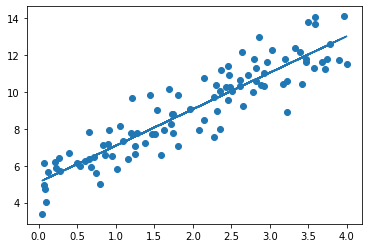

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)

w0 = 5; w1 = 2;
noise = np.random.randn(100,1)

x = 4 * np.random.rand(100,1)
y = w1*x + w0 + noise

linear_reg_model = LinearRegression()
linear_reg_model.fit(x,y)

print(f'w0 : {linear_reg_model.intercept_}, w1 : {linear_reg_model.coef_}')

y_pred = linear_reg_model.predict(x)

plt.scatter(x,y)
plt.plot(x, y_pred)

### 5.6.2 로지스틱 회귀 모델
- 시그모이드 함수를 활용해 타깃값에 포함 될 확률 예측 $\frac{1}{1+e^{-x}}$

### 5.6.3 결정 트리
- 스무고개
- 분할 방식 : 이전 분할 결과에 이후 결과가 영향 받음
- 불순도 : 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는가
- 엔트로피 : 불확실한 정도, (1-엔트로피 = 정보이득) / 지니 불순도

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify=cancer_data['target'], test_size=0.4, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

accuracy = decision_tree.score(X_test, y_test)

print(np.round(accuracy,4))

0.9298


### 5.6.4 앙상블 학습
- 보팅 : 개별 결과 종합.
- 하드 보팅 : 다수결 투표 방식
- 소프트 보팅 : 개별 예측 확률의 평균 => 대체로 나은 성능
- 배깅 : 개별 모델로 예측한 결과를 결합, 개별 모델이 서로 다른 샘플링 데이터 활용
- 부스팅 : 가중치를 활용해 분류 성능이 약한 모델 강하게 만듬. 잘못 예측한 데이터에 가중치를 부여하여 더 집중해 훈련

### 5.6.5 랜덤 포레스트
- 결정트리를 배깅 방식으로 결합한 모델
- n_estimator(결정트리 개수), criterion, max_depth(트리 최대 깊이), min_samples_split(노드 분할을 위한 최소 데이터 개수), min_samples_leaf(말단 노드가 되기 위한 최소 데이터 개수), max_features(분할에 사용할 피쳐 개수)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify=cancer_data['target'], test_size=0.4, random_state=42)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

accuracy = random_forest.score(X_test, y_test)

accuracy


0.9385964912280702

### 5.6.6. XGBoost
- 결정트리 직렬로 배치, 부스팅 -> 직전 트리가 예측한 값을 다음 트리가 활용해 예측값 조금씩 수정
- 파이썬 래퍼 XGBoost를 사용하려면 별도 데이터 셋을 생성 : 모델 훈련 및 예측 부분이 더 명시적
- booster : gbtree, dart(dropout 적용 gbtree)
- objective : 'reg:squarederror'(회귀), 'binary:logistic'(이진분류), 'multi:softmax'(다중 분류), 'multi:softprob'(확률값 다중분류)
- eta (learning rate) : 일반 0.0001~0.1
- max_depth : 개별 트리 최대 깊이, 3~10
- subsample : 개별 트리 훈련 시, 데이터 샘플링 비율, 0.6~1
- colsample_bytree : 개별 트리 훈련 시 피쳐 샘플링 비율, 0.6~1
- alpha (reg_alpha) : L1 규제 조정값
- lambda (reg_lambda) : L2  규제 조정값
- gamma (min_split_loss) : 말단 노드 분할하기 위한 최소 손실 감소 값
- min_child_weight : 과대적합 방지 위한 값
- scale_pos_weight : 불균형 데이터 가중치 조정 값 => (음성 타겟 # / 양성 타겟 #)로 설정
- random_state
- train 메서드 기능 : num_boost_round(부스팅 반복 횟수, 늘리면 learning_rate 줄여야 함) / early_stopping_rounds(조기종료 조건, 해당 조건 동안 성능 좋아지지 않으면 중단. eta가 작으면 크게 설정. 학습률이 작으면 그만큼 가중치가 천천히 갱신되므로 조기종료 조건이 커야 함) / verbose_eval (중간 성능 출력값이 너무 많아지는 것 방지)


### 5.6.7 LightGBM
- 말단 노드 중심으로 예측 오류를 최소화하게끔 분할. 다른 모델처럼 균형을 유지할 필요가 없어서 추가 연산도 필요 없음. 하지만 데이터 개수가 적을 때에는 과대적합되기 쉬움
- boosting_type : gbdt, dart, goss, rf
- objective : regression, binary, multiclass
- learning_rate (eta) : 학습률
- num_leaves : 개별 트리가 가질 수 있는 최대 말단 노드 개수, 값이 클 수록 과대적합 가능
- max_depth : 개별트리 깊이, 말단 노드 중심 분할이므로 크게 잡는게 좋음
- bagging_fraction (subsample) : 개별 트리 훈련시 사용할 데이터 샘플링 비율, bagging_freq 파라미터를 0이 아닌 값으로 설정 해야
- feature_fraction (colsample_bytree) : 개별 트리 훈련 시 피쳐 샘플링 비율
- lambda_l1 (reg_alpha) : L1 규제 조정값
- lambda_l2 (reg_lambda) : L2 규제 조정값
- min_child_samples : 말단 노드가 되기 위해 필요한 최소 데이터 갯수
- min_child_weight : 클수록 과대적합 방지
- bagging_freq (subsample_freq) : 배깅 수행 빈도, 몇 번의 이터레이션 마다 배깅 수행할지 결정, 1 전달 시 매 이터레이션 마다 트리가 새로운 샘플링 데이터로 학습
- force_row_wise : 메모리 충분하지 않을 때 효율을 높임
- train 메소드 기능 : num_boost_round, early_stopping_rounds(학습률이 작으면 early_stopping_rounds 크게 설정)

## 5.7 하이퍼파라미터 최적화
### 5.7.1 그리드 서치
- 모든 경우의 수를 탐색

### 5.7.2 랜덤 서치
- 무작위 탐색

### 5.7.3 베이지안 최적화
- 사전정보를 바탕으로 최적 하이퍼파라미터 값을 확률적으로 추정
- bayes_opt 패키지 이용
- 탐색범위 설정 -> 평가지표 계산함수 정의 -> BayesianOptimization 객체 생성 -> 베이지안 최적화 수행